In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%ls

dataset.zip  drive/  sample_data/


# Importing all libraries. Add libraries here

In [ ]:
import os
import shutil
import zipfile
import requests
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm
%matplotlib inline
os.chdir('/content/drive/MyDrive')

In [ ]:
os.getcwd()

'/content/drive/MyDrive'

In [ ]:
url = "https://amitpant.com.np/dataset.zip"
file_name = 'dataset.zip'

if not os.path.isfile(file_name):
  resp = requests.get(url)

  with open(file_name,'wb') as file:
    total_length = int(resp.headers.get('content-length'))
    progress_bar = tqdm(total=total_length, unit='iB', unit_scale=True)

    if total_length is None:
      for chunk in resp:
        file.write(chunk)

    else:
      length = 0
      total_length = int(total_length)

      for chunk in resp:
        progress_bar.update(len(chunk))
        file.write(chunk)

else:
  print("File exists.")

<ipython-input-3-5d8b82fcfb9e>:2: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


  0%|          | 0.00/4.34G [00:00<?, ?iB/s]

In [ ]:
# to check if all files exists, extract the zip file if the files doesn't exist

Normal = os.path.join('Normal')
TB_qatar = os.path.join('Tuberculosis-quatar')
pnemo_png = os.path.join('pnemo_png')
tb_shenzen = os.path.join('tb-shenzen')
tb_montgomery = os.path.join('tb-montgomery')

file_list = [Normal,TB_qatar,pnemo_png,tb_shenzen,tb_montgomery]
flag = 0

for i in file_list:
  isExist = os.path.exists(i)
  print(i,'exists :' ,str(isExist))
  if not isExist:
    flag = 1

if (flag == 1): 
  for i in file_list: 
    try:
      shutil.rmtree(os.path.join(i))
    except OSError as e:
      print("Error: %s - %s." % (e.filename, e.strerror))

  print('Extracting Zip file:')
  with zipfile.ZipFile(file_name , 'r') as zip_ref:
    for member in tqdm(zip_ref.infolist(), desc='Extracting '):
      zip_ref.extract(member)


Normal exists : True
Tuberculosis-quatar exists : True
pnemo_png exists : True
tb-shenzen exists : True
tb-montgomery exists : True


This code deletes all lung related folders.

import shutil

Normal = os.path.join('Normal')
TB_qatar = os.path.join('Tuberculosis-quatar')
pnemo_png = os.path.join('pnemo_png')
tb_shenzen = os.path.join('tb-shenzen')
tb_montgomery = os.path.join('tb-montgomery')

file_list = [Normal,TB_qatar,pnemo_png,tb_shenzen,tb_montgomery]
for i in file_list: 
    try:
      shutil.rmtree(os.path.join(i))
    except OSError as e:
      print("Error: %s - %s." % (e.filename, e.strerror))

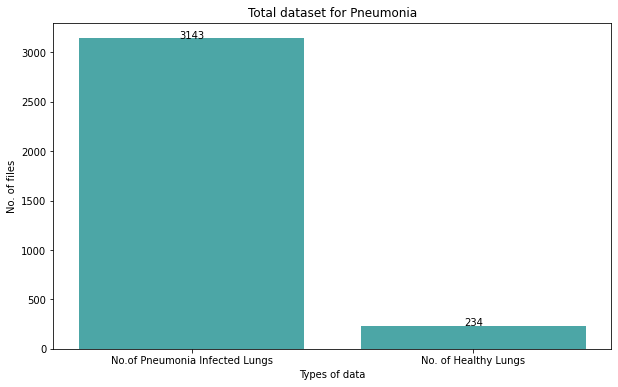

In [ ]:
plt.figure(figsize = (10, 6))

plt.title('Total dataset for Pneumonia')
plt.xlabel('Types of data')
plt.ylabel('No. of files')

x = ["No.of Pneumonia Infected Lungs","No. of Healthy Lungs"]
y= [sum_pneumonia, sum_normal]

plt.bar(x,y,color='teal',alpha=0.7)

for i in range(len(x)):
  plt.text(i,y[i],y[i],ha = 'center')

plt.show()